In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

from sklearn.cluster import KMeans
from PIL import Image

In [2]:
def kmeans_sklearn(img_1d, img_shape, k_cluster, init_centroids = 'random'):
    if init_centroids == 'random':
        kmeans = KMeans(n_clusters = k_cluster, init = 'k-means++', n_init = 'auto', max_iter = 300)
    elif init_centroids =='in_pixels':
        kmeans = KMeans(n_clusters = k_cluster, init = 'k-means++', n_init = 'auto', max_iter = 300)
    kmeans.fit(img_1d)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(img_shape)
    plt.title("kmeans_sklearn")
    plt.axis('off')
    plt.imshow(segmented_img / 255)

In [3]:
def kmeans(img_1d, k_clusters, max_iter = 300, init_centroids='random'):   
    height_width , channels = img_1d.shape

    # Check the init centroids
    if init_centroids == 'random':
        # randomly pick k rows of int from 0 to 256
        centroids = np.random.randint(0, 256, (k_clusters, channels)) 
    elif init_centroids == 'in_pixels':
        # randomly pick k rows of img_1d as initial centers
        rand_centroid = np.random.choice(range(height_width), k_clusters, replace = False)
        centroids = img_1d[rand_centroid]
    else:
        raise ValueError("Invalid option: 'random' or 'in_pixels'")
    for _ in range(max_iter):
        # Calculating distances between pixels and centroid
        distances = np.linalg.norm(img_1d[:, np.newaxis] - centroids, axis = 2) #2D array ; [:, np.newaxis] From 1D to 2D 

        # Determine which pixel for which (closest) centroids
        labels = np.argmin(distances, axis = 1) #1D array to return the min index found of the 2D distances array

        # Calculate centroids by taking the mean of pixels is assigned 
        temp_centroids = np.array([np.mean(img_1d[labels == k] if np.any(labels == k) else centroids, axis = 0) for k in range(k_clusters)])
        
        # The centroids don't change or change a little bit then break the loop
        if np.allclose(centroids, temp_centroids, atol = 1e-05):
            break
    
        centroids = temp_centroids
    
    return centroids, labels

# From centroids and labels to compressed image
def centroids_to_image(centroids, labels, img_shape):
    new_img = centroids[labels]
    new_img = new_img.reshape(img_shape)
    return new_img



In [4]:
# Take input from user
def user_input():
    img_name = input('Image name: ')
    k_clusters = int(input('Numbers of clusters: '))
    max_iter = int(input('Max iterator: '))
    init_centroids = input("Init centroids (random or in_pixels): ")
    file_extension  = input("Image output extension (png or pdf): ")
    
    return img_name, k_clusters, max_iter, init_centroids, file_extension

In [5]:
# pre-process for image
def img_process(img_name):
    img = mpl.image.imread(img_name)
    img_array = np.array(img)
    return img_array.reshape(-1, 3), img.shape

In [6]:
def export_img(new_img, file_extension):
    plt.imshow(new_img.astype(np.uint8))
    plt.title('Compressed image')
    plt.axis('off')
    if file_extension == 'pdf':
    # Save as PDF
        plt.savefig('output.pdf', format='pdf')
    elif file_extension == 'png':
    # Save as PNG
        plt.savefig('output.png', format='png', dpi=300)
    plt.title('kmeans')
    plt.show()

In [7]:
def main():
    img_name, k_clusters, max_iter, init_centroids, file_extension = user_input()
    img_1d, img_shape = img_process(img_name)
    start = time.time()
    centroids, labels = kmeans(img_1d, k_clusters, max_iter, init_centroids)
    end = time.time()
    print('kmeans time(s): ', (end - start))
    new_img = centroids_to_image(centroids, labels, img_shape)
    export_img(new_img, file_extension)
    start = time.time()
    kmeans_sklearn(img_1d, img_shape, k_clusters, init_centroids)
    end = time.time()
    print('kmeans_sklearn time(s): ', (end - start))
    
    

kmeans time(s):  1.9976081848144531


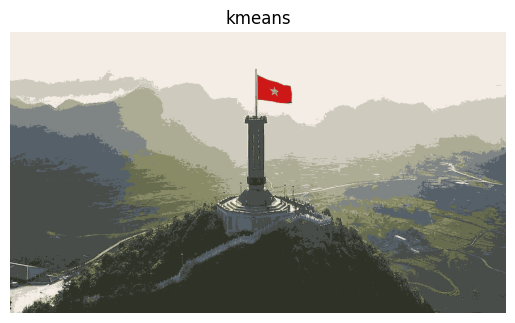

kmeans_sklearn time(s):  0.9075250625610352


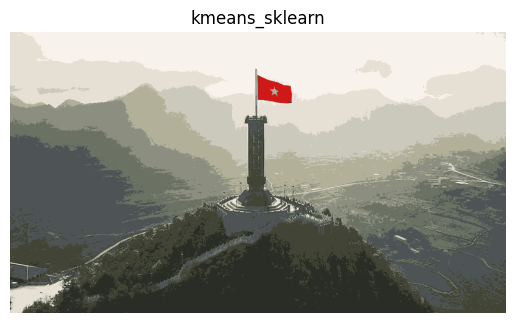

In [8]:
if __name__ == "__main__":
    main()